# Exploratory Data Analysis: Clean Data

In [1]:
pip install folium

In [3]:
pip install shapely

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------

In [4]:
import pandas as pd
# from geopy.geocoders import ArcGIS
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely.geometry import Point
import scipy.stats as stats
import statistics

from statsmodels.stats.outliers_influence import variance_inflation_factor

c:\Users\Lewell\miniconda3\envs\datascience1\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.2.0)/charset_normalizer (None) doesn't match a supported version!
  warnings.warn(


# Loading Data

In [7]:
df = pd.read_csv('C:/Users/Lewell/Documents/GitHub/p2-final-project-ftds-026-rmt-group-001/datasets/clean_data_fix.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
0,0,0,RUMAH 2 LANTAI TENGAH KOTA PERUMAHAN BUKIT DAM...,1500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,5.0,3.0,144,207,SHM - Sertifikat Hak Milik,4400
1,1,1,Rumah Luas Lokasi Strategis di Gunung Samarind...,3100.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,534,200,SHM - Sertifikat Hak Milik,2200
2,2,2,Rumah Minimalis Baru Renovasi Untuk Keluarga M...,600.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,2.0,2.0,80,140,SHM - Sertifikat Hak Milik,1300
3,3,3,"DIJUAL CEPAT RUMAH DI JALAN SWADAYA, KARANG RE...",510.0,"Balikpapan Tengah, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,2.0,201,150,SHM - Sertifikat Hak Milik,1300
4,4,4,Rumah Minimalis Modern Smart Home Tanah Luas,850.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,3.0,120,65,SHM - Sertifikat Hak Milik,2200


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1310 non-null   int64  
 1   Unnamed: 0     1310 non-null   int64  
 2   Judul          1310 non-null   object 
 3   Harga          1310 non-null   float64
 4   Lokasi         1310 non-null   object 
 5   Hyperlink      1310 non-null   object 
 6   Img_Hyperlink  1310 non-null   object 
 7   Kamar Tidur    1310 non-null   float64
 8   Kamar Mandi    1310 non-null   float64
 9   Luas Tanah     1310 non-null   int64  
 10  Luas Bangunan  1310 non-null   int64  
 11  Sertifikat     1310 non-null   object 
 12  Daya Listrik   1310 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.2+ KB


# Grouping of Location Data

In [24]:
df.Lokasi.value_counts().sort_index()

Lokasi
Balikpapan Barat, Balikpapan        6
Balikpapan Baru, Balikpapan       102
Balikpapan Kota, Balikpapan         8
Balikpapan Selatan, Balikpapan    511
Balikpapan Tengah, Balikpapan     101
Balikpapan Timur, Balikpapan       32
Balikpapan Utara, Balikpapan      329
Baru Tengah, Balikpapan             2
Batakan, Balikpapan                21
Batu Ampar, Balikpapan             18
Damai, Balikpapan                  36
Gn. Samarinda, Balikpapan          17
Gn. Sari Ilir, Balikpapan           6
Gunung Bahagia, Balikpapan         16
Karang Jati, Balikpapan             1
Karang Joang, Balikpapan            6
Karang Rejo, Balikpapan             5
Kariangau, Balikpapan               3
Klandasan Ilir, Balikpapan          7
Klandasan Ulu, Balikpapan           6
Lamaru, Balikpapan                  2
Manggar Baru, Balikpapan            1
Manggar, Balikpapan                 7
Marga Sari, Balikpapan              3
Muara Rapak, Balikpapan             2
Prapatan, Balikpapan                4
Sepin

In [25]:
# make list containing the kelurahan in each kecamatan

Balikpapan_Timur = ['Balikpapan Timur, Balikpapan', 'Lamaru, Balikpapan',
                     'Manggar, Balikpapan', 'Manggar Baru, Balikpapan', 
                     'Teritip, Balikpapan', 'Batakan, Balikpapan']

Balikpapan_Barat = ['Balikpapan Barat, Balikpapan', 'Baru Tengah, Balikpapan',
                    'Kariangau, Balikpapan', 'Marga Sari, Balikpapan',]

Balikpapan_Utara = ['Balikpapan Utara, Balikpapan', 'Batu Ampar, Balikpapan',
                    'Gn. Samarinda, Balikpapan', 'Karang Joang, Balikpapan',
                    'Muara Rapak, Balikpapan']

Balikpapan_Tengah = ['Balikpapan Tengah, Balikpapan', 'Gn. Sari Ilir, Balikpapan',
                     'Karang Jati, Balikpapan', 'Karang Rejo, Balikpapan', 
                     'Sumber Rejo, Balikpapan']

Balikpapan_Selatan = ['Balikpapan Selatan, Balikpapan', 'Sepinggan, Balikpapan', 
                      'Gunung Bahagia, Balikpapan']

Balikpapan_Kota = ['Damai, Balikpapan', 'Klandasan Ilir, Balikpapan', 
                   'Klandasan Ulu, Balikpapan', 'Prapatan, Balikpapan',
                   'Telaga Sari, Balikpapan']

In [30]:
# make loop to group location

new_loc_holder = []

for i in df['Lokasi']:
    if i in Balikpapan_Timur:
        new_loc_holder.append('Balikpapan Timur')
    elif i in Balikpapan_Barat:
        new_loc_holder.append('Balikpapan Barat')
    elif i in Balikpapan_Utara:
        new_loc_holder.append('Balikpapan Utara')
    elif i in Balikpapan_Tengah:
        new_loc_holder.append('Balikpapan Tengah')
    elif i in Balikpapan_Selatan:
        new_loc_holder.append('Balikpapan Selatan')
    elif i in Balikpapan_Kota:
        new_loc_holder.append('Balikpapan Kota')
    else: new_loc_holder.append('Balikpapan Baru')

In [40]:
#validate
new_loc_holder[705:715]

['Balikpapan Utara',
 'Balikpapan Selatan',
 'Balikpapan Selatan',
 'Balikpapan Tengah',
 'Balikpapan Timur',
 'Balikpapan Selatan',
 'Balikpapan Selatan',
 'Balikpapan Timur',
 'Balikpapan Selatan',
 'Balikpapan Selatan']

In [38]:
#validate
df['Lokasi'].iloc[705:715]

705      Balikpapan Utara, Balikpapan
706    Balikpapan Selatan, Balikpapan
707             Sepinggan, Balikpapan
708         Gn. Sari Ilir, Balikpapan
709               Batakan, Balikpapan
710    Balikpapan Selatan, Balikpapan
711    Balikpapan Selatan, Balikpapan
712                Lamaru, Balikpapan
713    Balikpapan Selatan, Balikpapan
714    Balikpapan Selatan, Balikpapan
Name: Lokasi, dtype: object

Insight = validated

In [41]:
# rewrite Lokasi
df['Lokasi'] = new_loc_holder

# Geospatial data analysis

In [181]:
# # Extracts complete address data
# def extract_last_two(loc):
#     parts = loc.split(', ')
#     return ', '.join(parts[-2:])
# df['Lokasi'] = df['Lokasi'].apply(extract_last_two)

In [182]:
# # Splitting the dataframe into several parts before latitude and longitude data extraction
# dfs = []
# for i in range(5):
#     dfs.append(df.iloc[i*433 : (i+1)*433])
# # Last dataframe gets the remaining rows
# dfs.append(df.iloc[5*433:])

In [184]:
# # Using python geocoders to get latitude and longitude data
# def get_lat_lon(location):
#     nom = ArcGIS(timeout=10)
#     geo = nom.geocode(location)
#     if geo:  # check if location was found
#         return geo.latitude, geo.longitude
#     else:  # return None if location not found
#         return None, None

In [185]:
# # Obtain latitude and longitude data from dataframe part 1 
# # (total extract time reaches around 10 minutes)
# dfs[0]['latitude'], dfs[0]['longitude'] = zip(*dfs[0]['Lokasi'].apply(get_lat_lon))

C:\Users\MASAYU\AppData\Local\Temp\ipykernel_16964\1035560551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[0]['latitude'], dfs[0]['longitude'] = zip(*dfs[0]['Lokasi'].apply(get_lat_lon))
C:\Users\MASAYU\AppData\Local\Temp\ipykernel_16964\1035560551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[0]['latitude'], dfs[0]['longitude'] = zip(*dfs[0]['Lokasi'].apply(get_lat_lon))


In [186]:
# # Obtain latitude and longitude data from dataframe part 2 
# dfs[1]['latitude'], dfs[1]['longitude'] = zip(*dfs[1]['Lokasi'].apply(get_lat_lon))

C:\Users\MASAYU\AppData\Local\Temp\ipykernel_16964\3549720569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[1]['latitude'], dfs[1]['longitude'] = zip(*dfs[1]['Lokasi'].apply(get_lat_lon))
C:\Users\MASAYU\AppData\Local\Temp\ipykernel_16964\3549720569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[1]['latitude'], dfs[1]['longitude'] = zip(*dfs[1]['Lokasi'].apply(get_lat_lon))


In [ ]:
# # Obtain latitude and longitude data from dataframe part 3 
# dfs[2]['latitude'], dfs[2]['longitude'] = zip(*dfs[2]['Lokasi'].apply(get_lat_lon))

In [ ]:
# # Obtain latitude and longitude data from dataframe part 4 
# dfs[3]['latitude'], dfs[3]['longitude'] = zip(*dfs[3]['Lokasi'].apply(get_lat_lon))

In [ ]:
# # Obtain latitude and longitude data from dataframe part 5 
# dfs[4]['latitude'], dfs[4]['longitude'] = zip(*dfs[4]['Lokasi'].apply(get_lat_lon))

In [ ]:
# # Obtain latitude and longitude data from dataframe part 6 
# dfs[5]['latitude'], dfs[5]['longitude'] = zip(*dfs[5]['Lokasi'].apply(get_lat_lon))

In [ ]:
# # Recombine data
# dfs = [dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5]]
# df = pd.concat(dfs, ignore_index=True)

# Comparasion of house price 

In [9]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Judul', 'Harga', 'Lokasi', 'Hyperlink',
       'Img_Hyperlink', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah',
       'Luas Bangunan', 'Sertifikat', 'Daya Listrik'],
      dtype='object')

In [10]:
# Visualization to compare house price data based on land and building area
fig = make_subplots(rows=1, cols=2, subplot_titles=('Land Area vs. Price', 'Building Area vs. Price'))

# Add scatter plots to the subplots
land_vs_price = go.Scatter(x=df['Luas Tanah'], y=df['Harga'], mode='markers', name='Land Area')
building_vs_price = go.Scatter(x=df['Luas Bangunan'], y=df['Harga'], mode='markers', name='Building Area')

fig.add_trace(land_vs_price, row=1, col=1)
fig.add_trace(building_vs_price, row=1, col=2)

# Update layout and axis titles
fig.update_layout(title_text="Comparison of Price vs. Area", )
fig.update_xaxes(title_text="Land Area (m2)", row=1, col=1)
fig.update_yaxes(title_text="Price (Rp)", row=1, col=1)
fig.update_xaxes(title_text="Building Area (m2)", row=1, col=2)
fig.update_yaxes(title_text="Price (Rp)", row=1, col=2)

fig.show()

**Insight** : 
    Most of the houses have a land area of under 500 square meters, and the same pattern can also be seen in the building area data, where most of this data also has an area of under 500 square meters. Also, The larger the land area or building area of a house, the price of the house is higher too.

In [190]:
# Visualization to compare house price data based on the number of bedrooms and bathrooms
# Functions to determine range
def bedroom_range(x):
    if x <= 2:
        return "1-2"
    elif x <= 4:
        return "3-4"
    elif x <= 6:
        return "5-6"
    else:
        return "7+"

def bathroom_range(x):
    if x <= 2:
        return "1-2"
    elif x <= 4:
        return "3-4"
    elif x <= 6:
        return "5-6"
    else:
        return "7+"

df['bedroom_range'] = df['Kamar Tidur'].apply(bedroom_range)
avg_prices_bedroom = df.groupby('bedroom_range').Harga.mean().reset_index()

df['bathroom_range'] = df['Kamar Mandi'].apply(bathroom_range)
avg_prices_bathroom = df.groupby('bathroom_range').Harga.mean().reset_index()

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('By Number of Bedrooms', 'By Number of Bathrooms'))

# Add bedroom data to the left subplot
fig.add_trace(
    go.Bar(x=avg_prices_bedroom['bedroom_range'], y=avg_prices_bedroom['Harga'], name='Bedrooms'),
    row=1, col=1
)

# Add bathroom data to the right subplot
fig.add_trace(
    go.Bar(x=avg_prices_bathroom['bathroom_range'], y=avg_prices_bathroom['Harga'], name='Bathrooms'),
    row=1, col=2
)

# Update layout
fig.update_layout(title_text="Average House Prices in Rp", showlegend=False)

fig.show()

**Insight** : Based on the plot, it can be seen that the more bedrooms or bathrooms a house has, the higher the potential price of the house.

# Check column

In [155]:
# Separating Numerical and Categorical Columns
num_columns = df.select_dtypes(include=['int', 'float']).columns
cat_columns = df.select_dtypes(include=['object']).columns


In [156]:
num_columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Harga', 'Kamar Tidur', 'Kamar Mandi',
       'Luas Tanah', 'Luas Bangunan'],
      dtype='object')

In [157]:
cat_columns

Index(['Judul', 'Lokasi', 'Hyperlink', 'Img_Hyperlink', 'Sertifikat',
       'Daya Listrik'],
      dtype='object')

# Visualization Numerical & Categorical data

In [158]:
# make numerical plotter
def diagnostic_plots(df1, variable):
    # Print skew value
    print(f'Skewness value of {variable}: {df1[variable].skew()}')
    # Print Mean
    print(f'Mean value of {variable} is {statistics.mean(df1[variable])}')
     # Print IQR Outlier
    q3, q1 = np.percentile(df1[variable], [75, 25])
    iqr = q3 - q1
    print(f'First Quartile is {q1}, Third Quartile is {q3}, IQR is {iqr}, and 3xIQR is {3*iqr}')
    print(f'Outliers will be removed are those below {q1-(3*iqr)} and higher than {q3+(3*iqr)}')

   
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=30)
    plt.title(f'Histogram of {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[variable])
    plt.title(f'Boxplot of {variable}')

    plt.show()

Skewness value of Harga: 4.649442780495503
Mean value of Harga is 2005.9603053435114
First Quartile is 850.0, Third Quartile is 2415.0, IQR is 1565.0, and 3xIQR is 4695.0
Outliers will be removed are those below -3845.0 and higher than 7110.0


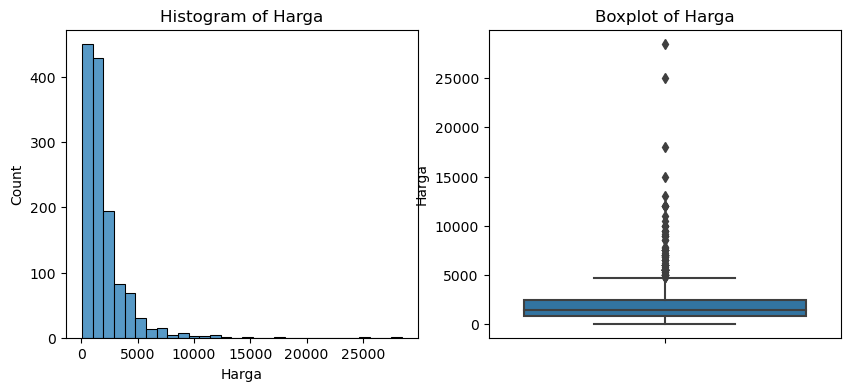

Skewness value of Kamar Tidur: 4.042740996833545
Mean value of Kamar Tidur is 3.5114503816793894
First Quartile is 2.0, Third Quartile is 4.0, IQR is 2.0, and 3xIQR is 6.0
Outliers will be removed are those below -4.0 and higher than 10.0


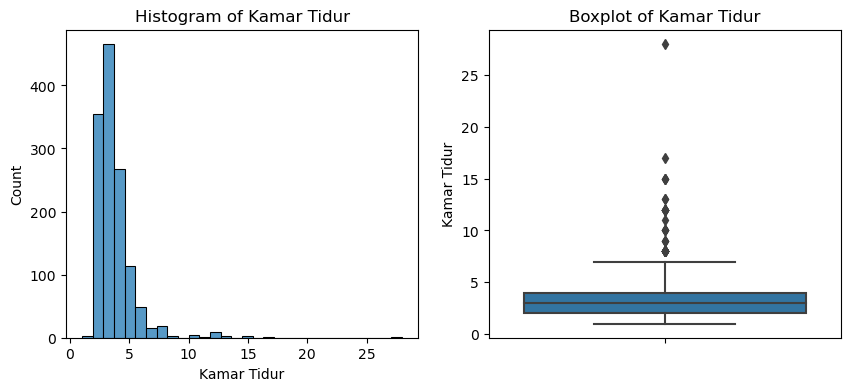

Skewness value of Kamar Mandi: 27.193348399853225
Mean value of Kamar Mandi is 2.5251908396946563
First Quartile is 2.0, Third Quartile is 3.0, IQR is 1.0, and 3xIQR is 3.0
Outliers will be removed are those below -1.0 and higher than 6.0


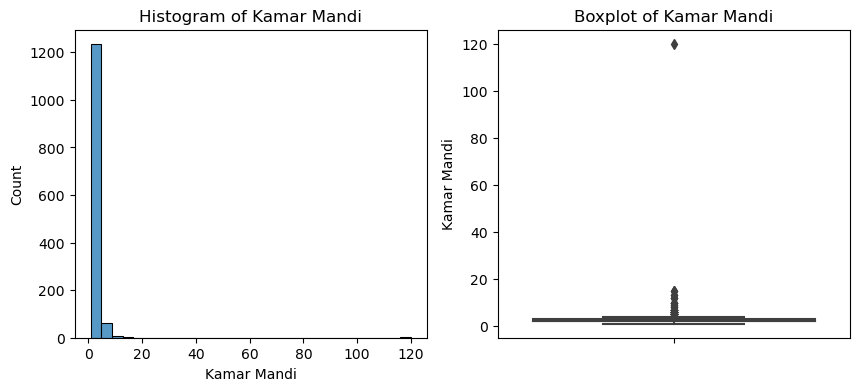

Skewness value of Luas Tanah: 8.624912782706815
Mean value of Luas Tanah is 221.08473282442748
First Quartile is 120.0, Third Quartile is 249.75, IQR is 129.75, and 3xIQR is 389.25
Outliers will be removed are those below -269.25 and higher than 639.0


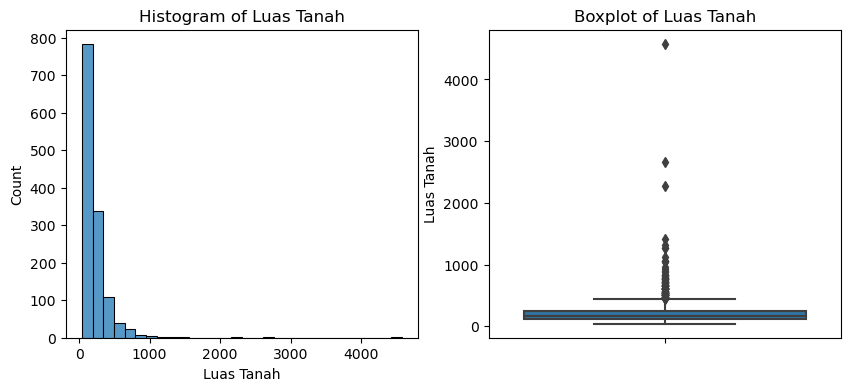

Skewness value of Luas Bangunan: 3.5190596410449047
Mean value of Luas Bangunan is 168.62824427480916
First Quartile is 81.0, Third Quartile is 210.0, IQR is 129.0, and 3xIQR is 387.0
Outliers will be removed are those below -306.0 and higher than 597.0


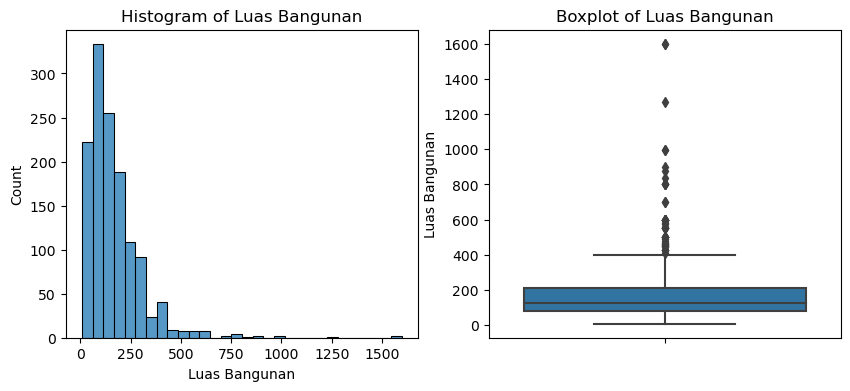

In [159]:
diagnostic_plots(df, 'Harga')
diagnostic_plots(df, 'Kamar Tidur')
diagnostic_plots(df, 'Kamar Mandi')
diagnostic_plots(df, 'Luas Tanah')
diagnostic_plots(df, 'Luas Bangunan')

**Insight** : 

1. Harga :

    - The distribution is highly right-skewed (skewness: 4.65), indicating a concentration of lower prices.
    - There are potential outliers both below and above the thresholds (-3845.0 and 7110.0).

2. Kamar Tidur :

    - The distribution is right-skewed (skewness: 4.04), suggesting a concentration of fewer bedrooms.
    - There are potential outliers both below and above the thresholds (-4.0 and 10.0).

3. Kamar Mandi :

    - The distribution is highly right-skewed (skewness: 27.19), indicating a concentration of fewer bathrooms.
    - There are potential outliers both below and above the thresholds (-1.0 and 6.0).

4. Luas Tanah :

    - The distribution is highly right-skewed (skewness: 8.62), suggesting a concentration of smaller land areas.
    - There are potential outliers both below and above the thresholds (-269.25 and 639.0).

5. Luas Bangunan :

    - The distribution is right-skewed (skewness: 3.52), indicating a concentration of smaller building areas.
    - There are potential outliers both below and above the thresholds (-306.0 and 597.0).


## Checking the outliers

### Kamar Tidur

In [15]:
# checking the luas tanah more than 3000
df_kamar_banget = df[df['Kamar Tidur'] > 10]

df_kamar_banget

,Unnamed: 0.1,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
71,77,78,Rumah mewah di perumahan Pupuk dan sejuk,28500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,15.0,15.0,1060,1600,SHM - Sertifikat Hak Milik,16500
84,90,91,Rumah kos tengah kota balikpapan,2900.0,"Balikpapan Kota, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,15.0,9.0,650,380,SHM - Sertifikat Hak Milik,4400
115,122,123,Dijual Rumah Kantor di Komplek Balikpapan Baru...,6900.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,12.0,9.0,295,500,SHM - Sertifikat Hak Milik,5500
290,303,312,"BALIKPAPAN, RUMAH LAHAN LUAS DIKOTA (Y360)",3700.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,11.0,8.0,1115,550,SHM - Sertifikat Hak Milik,7600
293,308,317,"RUMAH MEWAH, LANGSUNG CUAN",1100.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,28.0,10.0,200,200,SHM - Sertifikat Hak Milik,3500
428,461,485,RUMAH KONTRAKAN 6 PINTU SEPINGGAN BARU BALIKPAPAN,800.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,12.0,6.0,154,192,"Lainnya (PPJB,Girik,Adat,dll)",3500
483,521,551,MILONO,3200.0,"Klandasan Ulu, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,12.0,13.0,400,400,SHM - Sertifikat Hak Milik,3500
565,609,655,BALIKPAPAN RUMAH BESAR TENGAH KOTA,4200.0,"Klandasan Ilir, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,12.0,6.0,122,370,SHM - Sertifikat Hak Milik,5500
665,722,794,"Rumah Mewah Siap Huni di Pupuk, Balikpapan",25000.0,"Balikpapan Kota, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,15.0,15.0,1060,1600,SHM - Sertifikat Hak Milik,16500
777,840,930,RUMAH KOS DI AREA MILONO,3200.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,12.0,13.0,400,400,SHM - Sertifikat Hak Milik,3500


Insight = need to remove "kos", remove "milono" (all with milono in title is kos-kosan), remove 'RUMAH MEWAH LANGSUNG CUAN' (it's a kos-an in desc) and that's it

In [42]:
# removing

df = df[~df['Judul'].str.contains("KOS")]
df = df[~df['Judul'].str.contains("Kos")]
df = df[~df['Judul'].str.contains("kos")]
df = df[~df['Judul'].str.contains("MILONO")]
df = df[~df['Judul'].str.contains("Milono")]
df = df[~df['Judul'].str.contains("milono")]
df = df[~df['Judul'].str.contains("RUMAH MEWAH LANGSUNG CUAN")]

In [44]:
# see shape after removing
df.shape

(1295, 13)

### Kamar Mandi

In [16]:
# checking the luas tanah more than 3000
df_basah_banget = df[df['Kamar Mandi'] > 6]

df_basah_banget

,Unnamed: 0.1,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
71,77,78,Rumah mewah di perumahan Pupuk dan sejuk,28500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,15.0,15.0,1060,1600,SHM - Sertifikat Hak Milik,16500
84,90,91,Rumah kos tengah kota balikpapan,2900.0,"Balikpapan Kota, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,15.0,9.0,650,380,SHM - Sertifikat Hak Milik,4400
107,114,115,RUMAH DEKAT PASAR INPRES KEBUN SAYUR,3000.0,"Marga Sari, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,7.0,7.0,600,550,SHM - Sertifikat Hak Milik,1300
115,122,123,Dijual Rumah Kantor di Komplek Balikpapan Baru...,6900.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,12.0,9.0,295,500,SHM - Sertifikat Hak Milik,5500
194,202,209,PERUMAHAN ELITE FULL FURNISHED BALIKPAPAN BARU,2650.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,5.0,7.0,200,298,SHM - Sertifikat Hak Milik,5500
231,242,249,BALIKPAPAN RUMAH PINGGIR JALAN DR.SUTOMO (HM25),2200.0,"Karang Rejo, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,7.0,7.0,176,240,SHM - Sertifikat Hak Milik,2200
290,303,312,"BALIKPAPAN, RUMAH LAHAN LUAS DIKOTA (Y360)",3700.0,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,11.0,8.0,1115,550,SHM - Sertifikat Hak Milik,7600
293,308,317,"RUMAH MEWAH, LANGSUNG CUAN",1100.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,28.0,10.0,200,200,SHM - Sertifikat Hak Milik,3500
460,498,525,RUMAH MINiMALIS SIAP HUNI DI KEBUN SAYUR,3000.0,"Marga Sari, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,7.0,7.0,600,550,SHM - Sertifikat Hak Milik,1300
483,521,551,MILONO,3200.0,"Klandasan Ulu, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,12.0,13.0,400,400,SHM - Sertifikat Hak Milik,3500


Insight = most of the one that needs to be removed will be removed when we remove the kos and all else. Need to remove "SIAPA CEPAT DIA DAPAT 550 Juta" because that one is sus as hell

In [45]:
# removing 

df = df[~df['Judul'].str.contains("SIAPA CEPAT DIA DAPAT Seharga Rp 550 Juta")]

### Luas Tanah

In [11]:
# checking the luas tanah more than 3000
df_luas_banget = df[df['Luas Tanah'] > 3000]

df_luas_banget

,Unnamed: 0.1,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
495,533,564,"BALIKPAPAN, RUMAH PINGGIR JALAN TOL",18000.0,"Manggar, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,6.0,3.0,4580,600,SHM - Sertifikat Hak Milik,6600


Insight = data seems legit?

In [12]:
# checking the luas tanah more than 3000
df_luas_banget = df[df['Luas Tanah'] > 639]

df_luas_banget

,Unnamed: 0.1,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
71,77,78,Rumah mewah di perumahan Pupuk dan sejuk,28500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,15.0,15.0,1060,1600,SHM - Sertifikat Hak Milik,16500
84,90,91,Rumah kos tengah kota balikpapan,2900.0,"Balikpapan Kota, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,15.0,9.0,650,380,SHM - Sertifikat Hak Milik,4400
181,189,196,Rumah strategies dipinggir jalan besar depan s...,12000.0,"Gunung Bahagia, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,6.0,5.0,1270,1270,SHM - Sertifikat Hak Milik,6600
198,207,214,Dijual Rumah Bagus Furnished SHM di Perumahan ...,9000.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,4.0,3.0,670,400,SHM - Sertifikat Hak Milik,13200
238,249,256,BALIKPAPAN RUMAH & KONTRAKAN DI SEMOI (HM35),4500.0,"Marga Sari, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,10.0,2.0,880,600,SHM - Sertifikat Hak Milik,2200
247,260,267,RUMAH LUAS 1000 BESERTA LAHAN SIAP UNTUK USAHA,4500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,5.0,4.0,1034,580,SHM - Sertifikat Hak Milik,4400
249,262,269,RUMAH LUAS MEWAH DENGAN KOLAM RENANG DALAM KAW...,9500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,3.0,670,400,SHM - Sertifikat Hak Milik,13200
267,280,287,RUMAH MEWAH LUAS DENGAN KOLAM RENANG DI PERUMA...,5780.0,"Balikpapan Tengah, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,3.0,665,400,SHM - Sertifikat Hak Milik,4400
276,289,298,RUMAH LUAS BESAR DI BOULEVARD PERUMAHAN ELITE ...,7000.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,3.0,648,176,SHM - Sertifikat Hak Milik,3500
283,296,305,RUMAH CANTIK DEKAT PANTAI DI KAWASAN MULAWARMAN,10000.0,"Sepinggan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,5.0,826,998,SHM - Sertifikat Hak Milik,4400


In [13]:
len(df_luas_banget)

44

Insight = if we remove by IQR rule alone, 44 houses data that seems legit may will not be included, we'll lose some of the data. I'm recommending to remove outlier above 1500 as those higher than that seems fishy or seems like they're selling land but since it has a building atop of it they just put it in the House listing. 

In [46]:
# removing

df = df[df['Luas Tanah'] < 1500]

In [47]:
# see shape of data after remove
df.shape

(1291, 13)

## Luas Bangunan

In [14]:
df_gede_banget = df[df['Luas Bangunan'] > 597]
df_gede_banget

,Unnamed: 0.1,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
71,77,78,Rumah mewah di perumahan Pupuk dan sejuk,28500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,15.0,15.0,1060,1600,SHM - Sertifikat Hak Milik,16500
181,189,196,Rumah strategies dipinggir jalan besar depan s...,12000.0,"Gunung Bahagia, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,6.0,5.0,1270,1270,SHM - Sertifikat Hak Milik,6600
189,197,204,RUMAH 3 LANTAI FULL FURNISH DEPAN DOME RING RO...,3750.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,3.0,447,600,SHM - Sertifikat Hak Milik,4400
196,205,212,Dijual Rumah 2 Lantai Bagus SHM di Markoni Ata...,6000.0,"Balikpapan Kota, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,4.0,3.0,343,875,SHM - Sertifikat Hak Milik,3500
238,249,256,BALIKPAPAN RUMAH & KONTRAKAN DI SEMOI (HM35),4500.0,"Marga Sari, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,10.0,2.0,880,600,SHM - Sertifikat Hak Milik,2200
283,296,305,RUMAH CANTIK DEKAT PANTAI DI KAWASAN MULAWARMAN,10000.0,"Sepinggan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,4.0,5.0,826,998,SHM - Sertifikat Hak Milik,4400
430,463,487,BALIKPAPAN RUMAH HOOK MEWAH PERUMAHAN BALIKPAP...,7500.0,"Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,6.0,4.0,575,900,SHM - Sertifikat Hak Milik,13300
433,467,491,rumah plus toko dipinggir jalan besar dan star...,6000.0,"Sepinggan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,9.0,4.0,700,700,SHM - Sertifikat Hak Milik,4400
495,533,564,"BALIKPAPAN, RUMAH PINGGIR JALAN TOL",18000.0,"Manggar, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,6.0,3.0,4580,600,SHM - Sertifikat Hak Milik,6600
501,539,570,Rumah Mewah Balikpapan,7500.0,"Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,5.0,3.0,450,800,SHM - Sertifikat Hak Milik,5500


Insight = all the outlier data seems pretty logical and likely to exist IRL. Area of Building can get big if you just add floors. I'm suggesting to not remove these.

### Add back furnished

In [76]:
# load the csv with the furnished info

df2=pd.read_csv('C:/Users/Lewell/Documents/GitHub/p2-final-project-ftds-026-rmt-group-001/datasets/rumah123_data_single_raw_concated.csv')
df2.head(5)

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,...,Kondisi Perabotan,Jumlah Lantai,Pemandangan,Terjangkau Internet,Lebar Jalan,Sumber Air,Hook,Kondisi Properti,Tipe Iklan,Unnamed: 0.1
0,0,RUMAH 2 LANTAI TENGAH KOTA PERUMAHAN BUKIT DAM...,"Rp 1,5 Miliar","Balikpapan Selatan, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,5.0,3.0,144 m²,207 m²,...,Semi Furnished,2.0,Pemukiman Warga,Ya,2 Mobil,PAM atau PDAM,Tidak,Bagus,Dijual,NaN
1,1,Rumah Luas Lokasi Strategis di Gunung Samarind...,"Rp 3,1 Miliar","Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,534 m²,200 m²,...,NaN,1.0,NaN,Ya,NaN,PAM atau PDAM,Tidak,Bagus,Dijual,NaN
2,2,Rumah Minimalis Baru Renovasi Untuk Keluarga M...,Rp 600 Juta,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,2.0,2.0,80 m²,140 m²,...,Semi Furnished,1.0,NaN,Ya,NaN,PAM atau PDAM,Tidak,Bagus,Dijual,NaN
3,3,"DIJUAL CEPAT RUMAH DI JALAN SWADAYA, KARANG RE...",Rp 510 Juta,"Balikpapan Tengah, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123/720x420-crop...,3.0,2.0,201 m²,150 m²,...,Unfurnished,1.0,NaN,Tidak,NaN,NaN,Tidak,Bagus,Dijual,NaN
4,4,Rumah Minimalis Modern Smart Home Tanah Luas,Rp 850 Juta,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,3.0,120 m²,65 m²,...,Unfurnished,2.0,Pemukiman Warga,Ya,NaN,Sumur Bor,Tidak,Baru,Dijual,NaN


In [77]:
new_furnished_holder = []

for i in df2['Kondisi Perabotan']:
    if i == 'Semi Furnished':
        new_furnished_holder.append('Semi Furnished')
    elif i == 'Unfurnished':
        new_furnished_holder.append('Unfurnished')
    elif i == 'Furnished':
        new_furnished_holder.append('Furnished')
    else: new_furnished_holder.append('Unknown')
    

In [78]:
df2['Kondisi Perabotan'].head(10) #to validate

0    Semi Furnished
1               NaN
2    Semi Furnished
3       Unfurnished
4       Unfurnished
5       Unfurnished
6       Unfurnished
7    Semi Furnished
8               NaN
9    Semi Furnished
Name: Kondisi Perabotan, dtype: object

In [79]:
new_furnished_holder[0:10] # to validate

['Semi Furnished',
 'Unknown',
 'Semi Furnished',
 'Unfurnished',
 'Unfurnished',
 'Unfurnished',
 'Unfurnished',
 'Semi Furnished',
 'Unknown',
 'Semi Furnished']

Insight = validated, NaN is now Unknown

In [80]:
# replace the white spaces, get rid of m2, then turn to integer

df2['Luas Tanah'] = df2['Luas Tanah'].str.replace(' ','')
df2['Luas Tanah'] = df2['Luas Tanah'].str.replace('m²','')
df2['Luas Tanah'] = df2['Luas Tanah'].astype(int)

df2['Luas Bangunan'] = df2['Luas Bangunan'].str.replace(' ','')
df2['Luas Bangunan'] = df2['Luas Bangunan'].str.replace('m²','')
df2['Luas Bangunan'] = df2['Luas Bangunan'].astype(int)

In [81]:
# write 

df2['Kondisi Perabotan'] = new_furnished_holder

In [82]:
# clean the df2 index to match the index value

#drop the kost and the hotel

df2 = df2[~df2['Judul'].str.contains("KOST")]
df2 = df2[~df2['Judul'].str.contains("Kost")]
df2 = df2[~df2['Judul'].str.contains("kost")]
df2 = df2[~df2['Judul'].str.contains("KOST2AN")]
df2 = df2[~df2['Judul'].str.contains("DIJUAL HOTEL DI PUSAT")]

# removing the weird one
df2 = df2[~df2['Judul'].str.contains("SIAPA CEPAT DIA DAPAT Seharga Rp 550 Juta")]

# removing luas tanah bigg
df2 = df2[df2['Luas Tanah'] < 1500]
df2 = df2[df2['Luas Bangunan'] < 3000]

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 0 to 1449
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1420 non-null   int64  
 1   Judul                1420 non-null   object 
 2   Harga                1420 non-null   object 
 3   Lokasi               1420 non-null   object 
 4   Hyperlink            1420 non-null   object 
 5   Img_Hyperlink        1420 non-null   object 
 6   Kamar Tidur          1372 non-null   float64
 7   Kamar Mandi          1373 non-null   float64
 8   Luas Tanah           1420 non-null   int32  
 9   Luas Bangunan        1420 non-null   int32  
 10  Carport              254 non-null    float64
 11  Tipe Properti        1420 non-null   object 
 12  Sertifikat           1419 non-null   object 
 13  Daya Listrik         1371 non-null   object 
 14  Kamar Pembantu       245 non-null    float64
 15  Dapur                225 non-null    float6

In [85]:
# dropping irrelevant features
# also dropping the tipe properti and tipe iklan because they all are same across all rows, 'Rumah' and 'Dijual'

df2.drop(['Carport' , 'Kamar Pembantu', 'Dapur', 
         'Ruang Makan', 'Ruang Tamu', 
         'Pemandangan', 'Terjangkau Internet', 'Sumber Air', 
         'Hook', 'Kondisi Properti', 'Jumlah Lantai','Lebar Jalan', 
         'Tipe Iklan','Tipe Properti', 'Unnamed: 0.1'], axis='columns', inplace=True)

In [86]:
# see

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1420 non-null   int64  
 1   Judul              1420 non-null   object 
 2   Harga              1420 non-null   object 
 3   Lokasi             1420 non-null   object 
 4   Hyperlink          1420 non-null   object 
 5   Img_Hyperlink      1420 non-null   object 
 6   Kamar Tidur        1372 non-null   float64
 7   Kamar Mandi        1373 non-null   float64
 8   Luas Tanah         1420 non-null   int32  
 9   Luas Bangunan      1420 non-null   int32  
 10  Sertifikat         1419 non-null   object 
 11  Daya Listrik       1371 non-null   object 
 12  Kondisi Perabotan  1420 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 144.2+ KB


In [87]:
# dropping empty bedroom, bathroom, and electricity data
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1322 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1322 non-null   int64  
 1   Judul              1322 non-null   object 
 2   Harga              1322 non-null   object 
 3   Lokasi             1322 non-null   object 
 4   Hyperlink          1322 non-null   object 
 5   Img_Hyperlink      1322 non-null   object 
 6   Kamar Tidur        1322 non-null   float64
 7   Kamar Mandi        1322 non-null   float64
 8   Luas Tanah         1322 non-null   int32  
 9   Luas Bangunan      1322 non-null   int32  
 10  Sertifikat         1322 non-null   object 
 11  Daya Listrik       1322 non-null   object 
 12  Kondisi Perabotan  1322 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 134.3+ KB


In [89]:
# see if there are any duplicated titles
df2['Judul'].duplicated().value_counts()

Judul
False    1306
True       16
Name: count, dtype: int64

In [90]:
# drop the duplicates that are in Judul
df2 = df2.drop_duplicates(subset=['Judul'], keep='first')

In [91]:
# see change
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1306 non-null   int64  
 1   Judul              1306 non-null   object 
 2   Harga              1306 non-null   object 
 3   Lokasi             1306 non-null   object 
 4   Hyperlink          1306 non-null   object 
 5   Img_Hyperlink      1306 non-null   object 
 6   Kamar Tidur        1306 non-null   float64
 7   Kamar Mandi        1306 non-null   float64
 8   Luas Tanah         1306 non-null   int32  
 9   Luas Bangunan      1306 non-null   int32  
 10  Sertifikat         1306 non-null   object 
 11  Daya Listrik       1306 non-null   object 
 12  Kondisi Perabotan  1306 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 132.6+ KB


In [92]:
# removing

df2 = df2[~df2['Judul'].str.contains("KOS")]
df2 = df2[~df2['Judul'].str.contains("Kos")]
df2 = df2[~df2['Judul'].str.contains("kos")]
df2 = df2[~df2['Judul'].str.contains("MILONO")]
df2 = df2[~df2['Judul'].str.contains("Milono")]
df2 = df2[~df2['Judul'].str.contains("milono")]
df2 = df2[~df2['Judul'].str.contains("RUMAH MEWAH LANGSUNG CUAN")]

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1291 non-null   int64  
 1   Judul              1291 non-null   object 
 2   Harga              1291 non-null   object 
 3   Lokasi             1291 non-null   object 
 4   Hyperlink          1291 non-null   object 
 5   Img_Hyperlink      1291 non-null   object 
 6   Kamar Tidur        1291 non-null   float64
 7   Kamar Mandi        1291 non-null   float64
 8   Luas Tanah         1291 non-null   int32  
 9   Luas Bangunan      1291 non-null   int32  
 10  Sertifikat         1291 non-null   object 
 11  Daya Listrik       1291 non-null   object 
 12  Kondisi Perabotan  1291 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 131.1+ KB


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1291 non-null   int64  
 1   Unnamed: 0     1291 non-null   int64  
 2   Judul          1291 non-null   object 
 3   Harga          1291 non-null   float64
 4   Lokasi         1291 non-null   object 
 5   Hyperlink      1291 non-null   object 
 6   Img_Hyperlink  1291 non-null   object 
 7   Kamar Tidur    1291 non-null   float64
 8   Kamar Mandi    1291 non-null   float64
 9   Luas Tanah     1291 non-null   int64  
 10  Luas Bangunan  1291 non-null   int64  
 11  Sertifikat     1291 non-null   object 
 12  Daya Listrik   1291 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 141.2+ KB


In [95]:
# add kondisi perabotan to df

df['Kondisi Perabotan'] = df2['Kondisi Perabotan']

In [98]:
df.iloc[5:11]

,Unnamed: 0.1,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan
5,5,5,Rumah 2 Lantai Lokasi Premium Balikpapan,1050.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,90,70,HGB - Hak Guna Bangunan,2200,Unfurnished
6,6,6,"Rumah Cantik 2,5 Lantai Konsep Scandinavian De...",900.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,78,100,SHM - Sertifikat Hak Milik,2200,Unfurnished
7,7,7,cepat rumah perumahan denhag luas 400m2,4500.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,6.0,4.0,396,400,SHM - Sertifikat Hak Milik,4400,Semi Furnished
8,8,8,Rumah Strategis Akses Mudah di Perum. Balikpap...,2500.0,Balikpapan Baru,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,305,100,SHM - Sertifikat Hak Milik,2200,Unknown
9,9,9,Rumah SHM di Perumahan Asri Bukit Mutiara Kuta...,1500.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,157,111,SHM - Sertifikat Hak Milik,4400,Semi Furnished
10,10,10,Rumah 230 Meter Jalan Raya Dekat Fasilitas Pen...,690.0,Balikpapan Utara,https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,144,60,SHM - Sertifikat Hak Milik,1300,Unfurnished


In [100]:
df2.iloc[5:11]

,Unnamed: 0,Judul,Harga,Lokasi,Hyperlink,Img_Hyperlink,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Kondisi Perabotan
5,5,Rumah 2 Lantai Lokasi Premium Balikpapan,"Rp 1,05 Miliar","Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,90,70,HGB - Hak Guna Bangunan,2200 Watt,Unfurnished
6,6,"Rumah Cantik 2,5 Lantai Konsep Scandinavian De...",Rp 900 Juta,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,78,100,SHM - Sertifikat Hak Milik,2200 Watt,Unfurnished
7,7,cepat rumah perumahan denhag luas 400m2,"Rp 4,5 Miliar","Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,6.0,4.0,396,400,SHM - Sertifikat Hak Milik,4400 Watt,Semi Furnished
8,8,Rumah Strategis Akses Mudah di Perum. Balikpap...,"Rp 2,5 Miliar","Balikpapan Baru, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,305,100,SHM - Sertifikat Hak Milik,2200 Watt,Unknown
9,9,Rumah SHM di Perumahan Asri Bukit Mutiara Kuta...,"Rp 1,5 Miliar","Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,157,111,SHM - Sertifikat Hak Milik,4400 Watt,Semi Furnished
10,10,Rumah 230 Meter Jalan Raya Dekat Fasilitas Pen...,Rp 690 Juta,"Balikpapan Utara, Balikpapan",https://www.rumah123.com//properti/balikpapan/...,https://picture.rumah123.com/r123-images/720x4...,3.0,2.0,144,60,SHM - Sertifikat Hak Milik,1300 Watt,Unfurnished


In [ ]:
# save to csv

df.to_csv('C:/Users/Lewell/Documents/GitHub/p2-final-project-ftds-026-rmt-group-001/datasets/clean_data_fix.csv')

# Visualization Categorical column

In [160]:
# make categorical plotter
    
def diagnostic_plots_categ(df1, variable):

    # Define figure size
    plt.figure(figsize=(20, 10))

    # Barh
    plt.subplot(1, 2, 1)
    df1[variable].value_counts().sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Bar chart of {variable}')

    # Pie plot
    plt.subplot(1, 2, 2)
    df1[variable].value_counts().sort_values(ascending=True).plot(kind = 'pie', autopct="%.1f%%")
    plt.title(f'Pie chart of {variable}')

    plt.show()

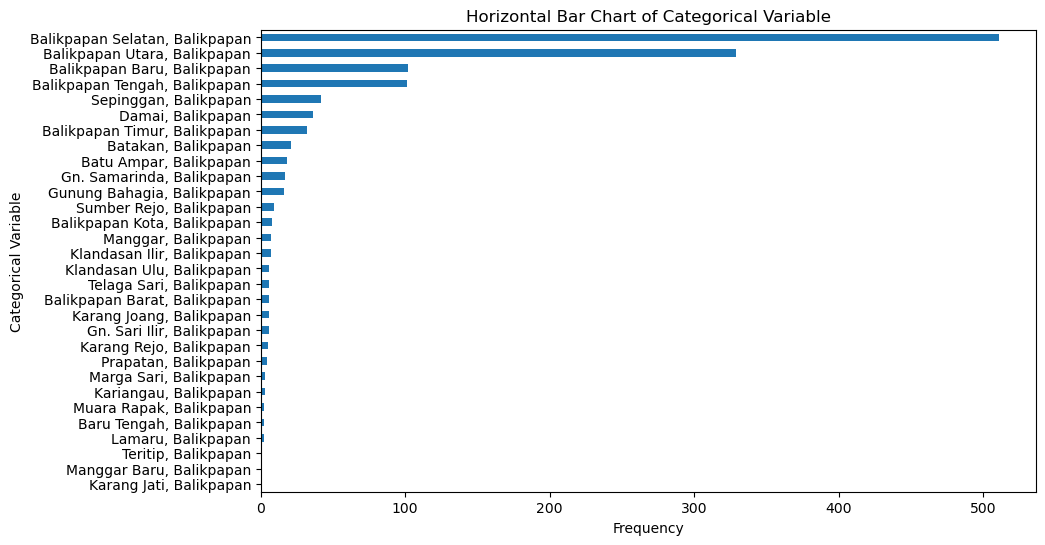

In [161]:
plt.figure(figsize=(10,6))
df['Lokasi'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of Categorical Variable')
plt.xlabel('Frequency')
plt.ylabel('Categorical Variable')
plt.show()

**Insight** : From the bar chart, most of house locations are in the South Balikpapan area

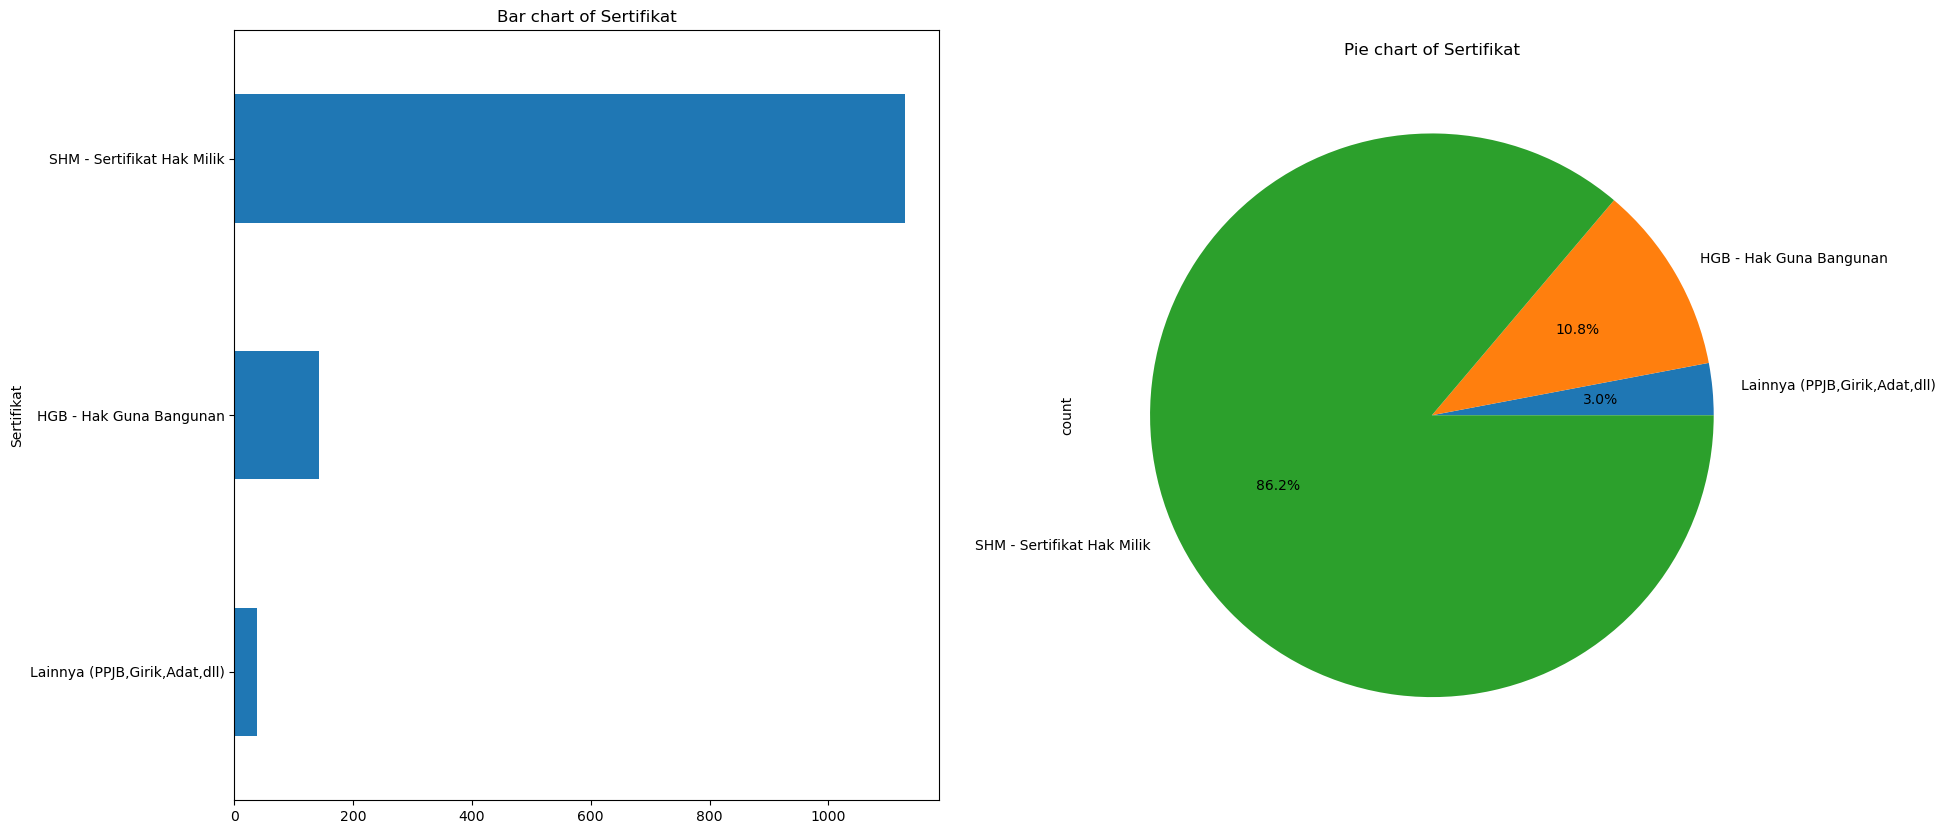

In [162]:
diagnostic_plots_categ(df, 'Sertifikat')

**Insight** : From 3 type of sertifikat, the Sertifikat Hak Milik is have 86% distibution thus making it the most common type of certificate in home sales

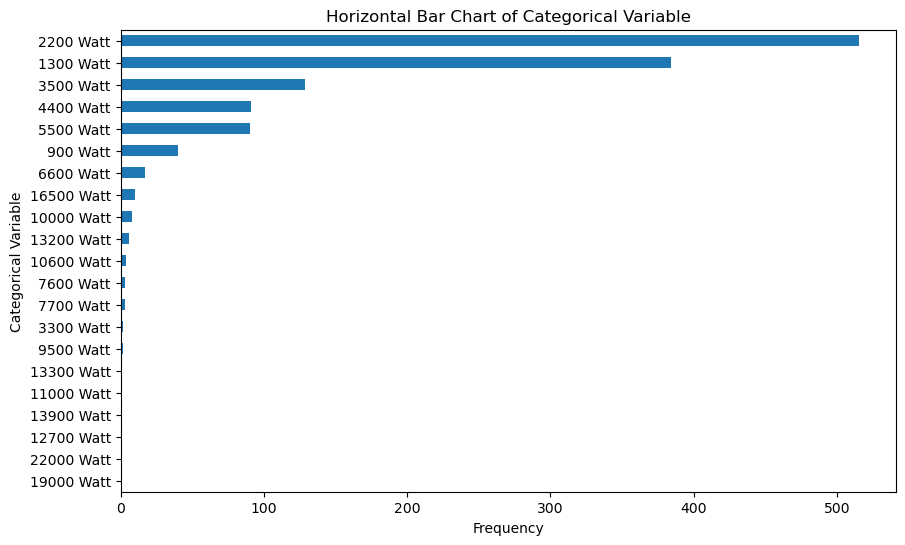

In [163]:
plt.figure(figsize=(10,6))
df['Daya Listrik'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of Categorical Variable')
plt.xlabel('Frequency')
plt.ylabel('Categorical Variable')
plt.show()

Insight : Most houses for sale have electrical power of 2200 watts

# Check Linear Relationship

In [164]:
data = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Judul', 'Lokasi', 'Hyperlink' , 'Img_Hyperlink', 'Sertifikat', 'Daya Listrik' ], axis=1)

In [165]:
data

,Harga,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan
0,1500.0,5.0,3.0,144,207
1,3100.0,3.0,2.0,534,200
2,600.0,2.0,2.0,80,140
3,510.0,3.0,2.0,201,150
4,850.0,3.0,3.0,120,65
...,...,...,...,...,...
1305,1760.0,3.0,2.0,88,105
1306,3260.0,4.0,3.0,200,172
1307,1800.0,3.0,2.0,200,200
1308,8500.0,4.0,2.0,520,380


In [166]:
# Splitting between `X` and `y`
X = data.drop('Harga', axis=1)
y = data['Harga']
X

,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan
0,5.0,3.0,144,207
1,3.0,2.0,534,200
2,2.0,2.0,80,140
3,3.0,2.0,201,150
4,3.0,3.0,120,65
...,...,...,...,...
1305,3.0,2.0,88,105
1306,4.0,3.0,200,172
1307,3.0,2.0,200,200
1308,4.0,2.0,520,380


# Calculate Variance Inflation Factor (VIF)

In [167]:
# Create a function to calculate Variance Inflation Factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [168]:
# Check Multicolinearity in X

calc_vif(X)

,variables,VIF
0,Kamar Tidur,4.043495
1,Kamar Mandi,1.685968
2,Luas Tanah,3.032991
3,Luas Bangunan,4.938469


**Insight** : Overall, the VIF values are in the moderate range, indicating some degree of multicollinearity. Next we check the correlation between column

# Check correlation maps

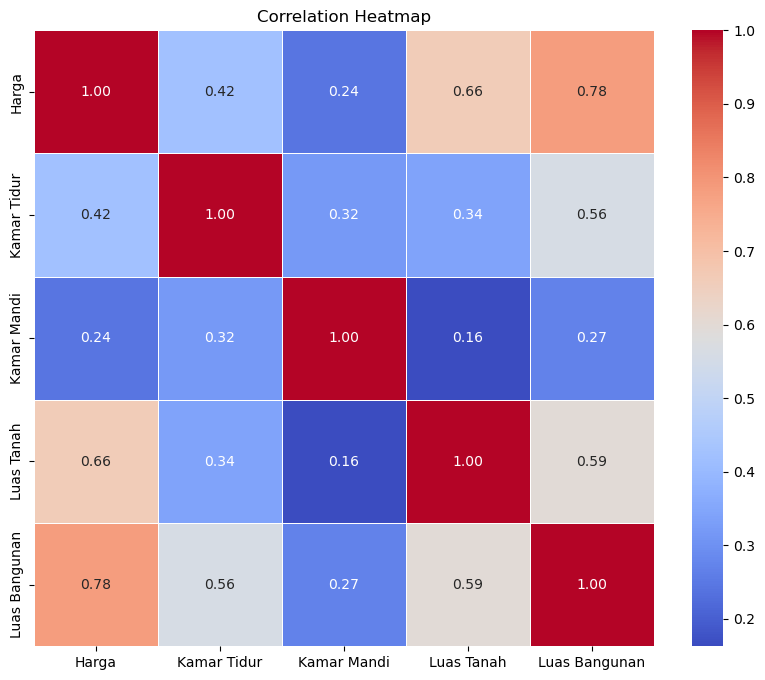

In [169]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

**Insight** : From the correlation maps, it conclude that column Luas Bangunan and Luas Tanah have a strong correlation with column Harga.

# Check correlation matrix

In [170]:
correlation_matrix = data.corr()
correlation_to_price = correlation_matrix['Harga']
# Print correlation values
print(correlation_to_price)

Harga            1.000000
Kamar Tidur      0.421605
Kamar Mandi      0.243234
Luas Tanah       0.661016
Luas Bangunan    0.781303
Name: Harga, dtype: float64


**Insight** : Same like correlation maps, the results of correlation matrix also show that Luas Tanah and Luas Bangunan have a strong correlation with Harga